# Session 3-- Graphing and manipulating data

## Session 3 is composed of 2 parts

- Module 5: Graphing and mapping
    - Notes
    - Video

- Module 6: Data manipulation and panel regressions
    - Notes (current page)
    - Video

## A.1 Import libraries

In [1]:
library(stringr)
library(leaflet)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# 1. Graphing: Basic functions




## 1.1 Histograms

In [54]:
url = 'https://raw.githubusercontent.com/corybaird/PLCY_610_public_2020/master/Discussion_sections/Disc12_PS6/pakistan.csv?token=AHPGGTCJOFNZQF4X34DVFUDBKOELW'
df = read.csv(url)
df %>% head(2)

totexp   food     hhincomepc
1 3860.917 2147.583 17800.000 
2 2341.984 1464.000  7055.027

### 1.1.1 Method 1

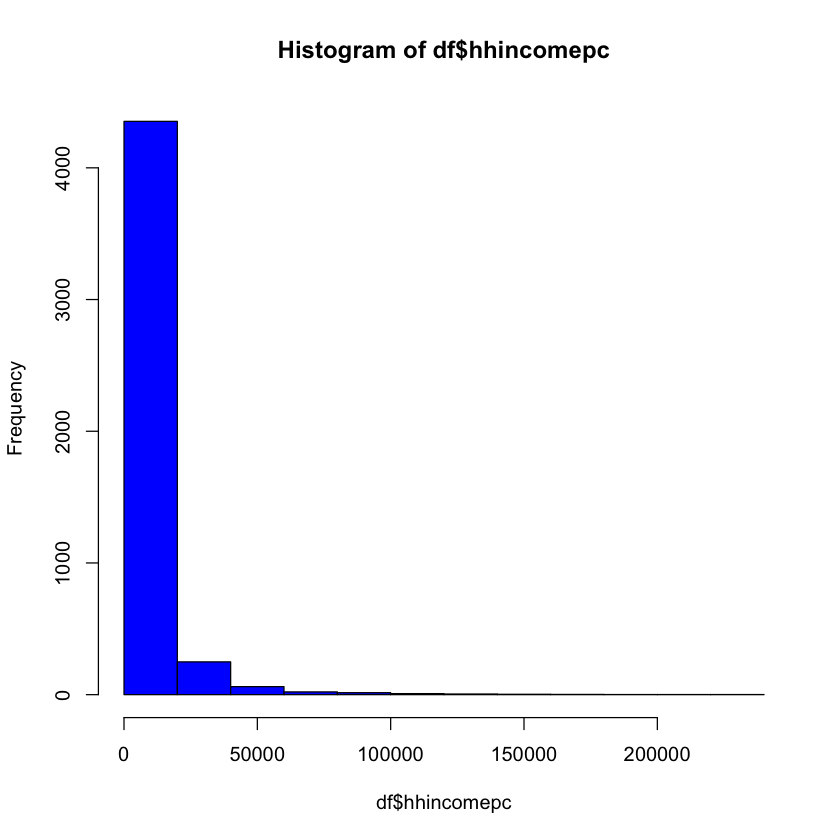

In [55]:
hist(df$hhincomepc, col='blue')

### 1.1.2 Method 2

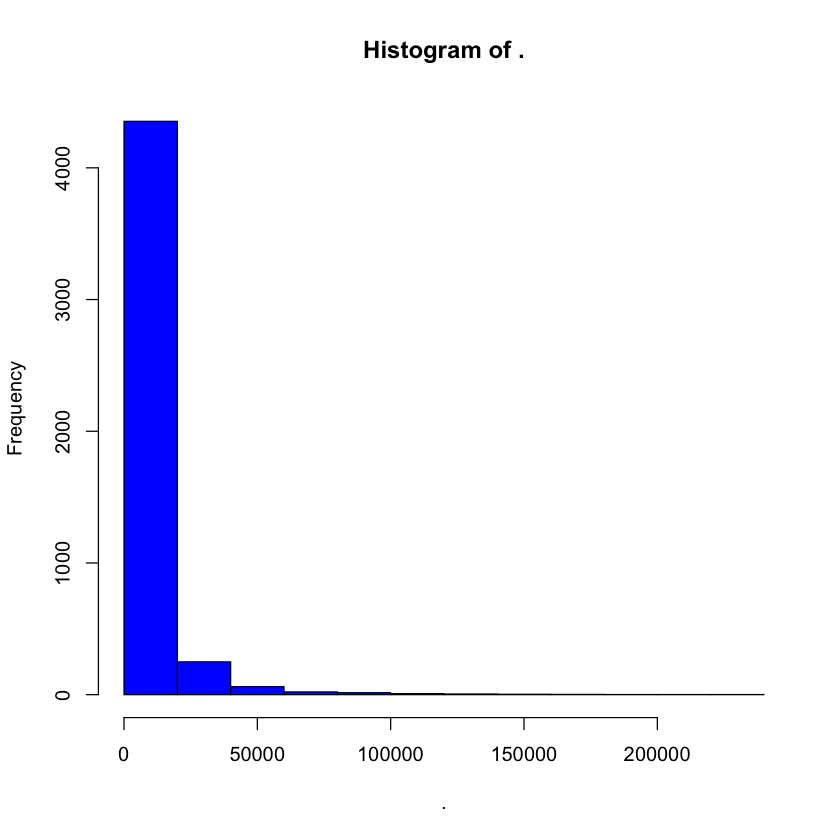

In [56]:
df %>% 
pull(hhincomepc)  %>% 
hist(col = 'blue')

### 1.1.3 Side by side graph

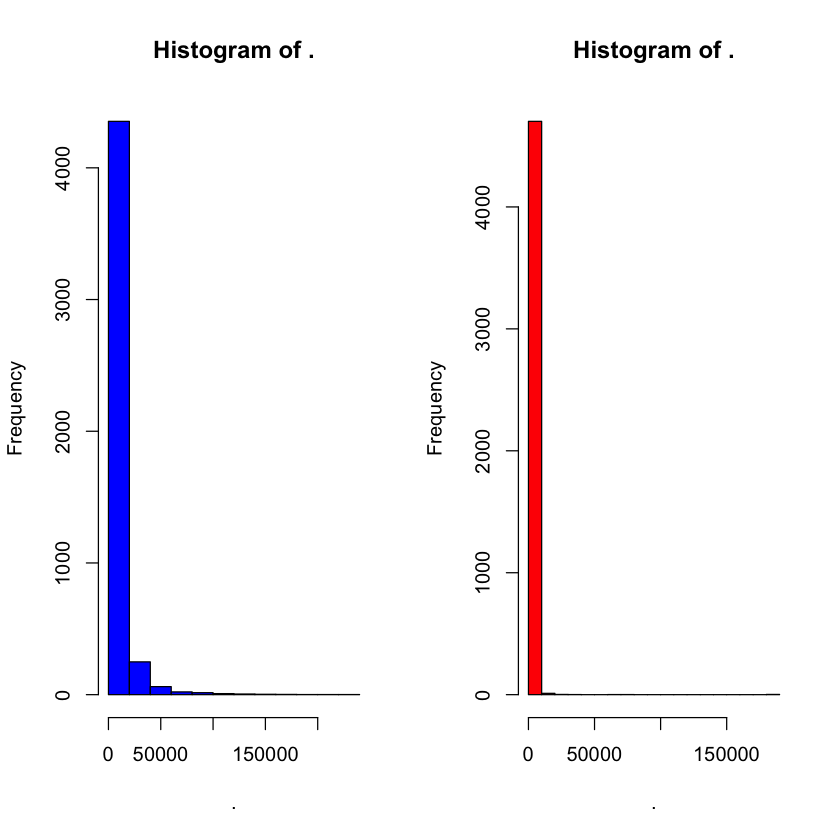

In [58]:
par(mfrow=c(1,2))
# Hist 1
df %>% 
pull(hhincomepc)  %>% 
hist(col = 'blue')

# Hist 2
df %>% 
pull(food)  %>% 
hist(col = 'red')

## 1.2 Scatter

In [5]:
df %>% names()

[1] "totexp"     "food"       "hhincomepc"

#### 1.1.2.1 Method 1

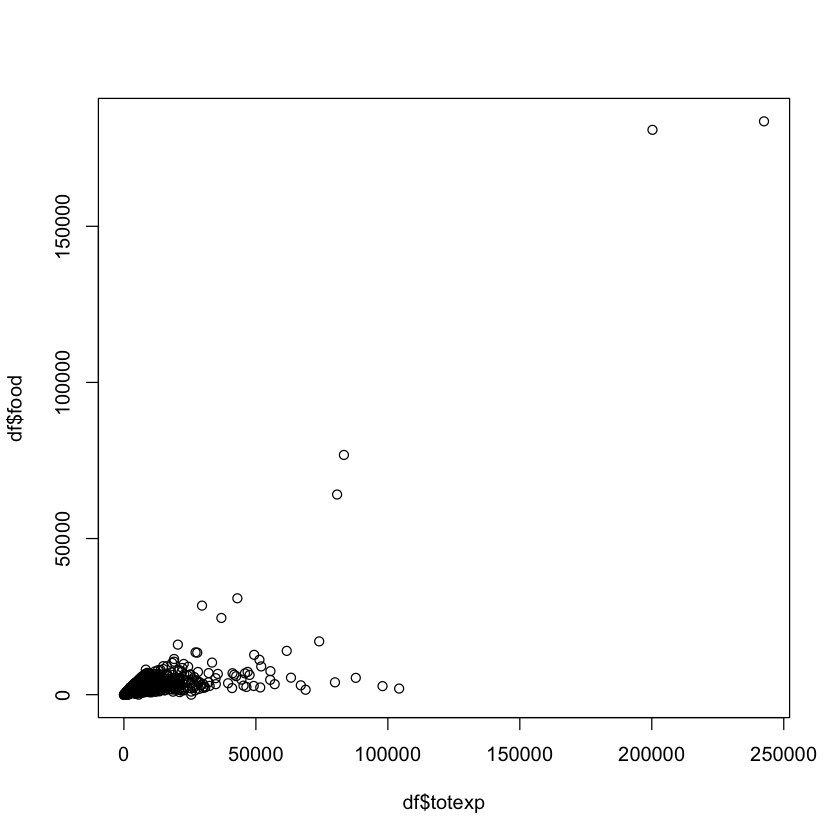

In [6]:
plot(df$totexp, df$food)

#### 1.1.2.2 Method 2: DPLYR

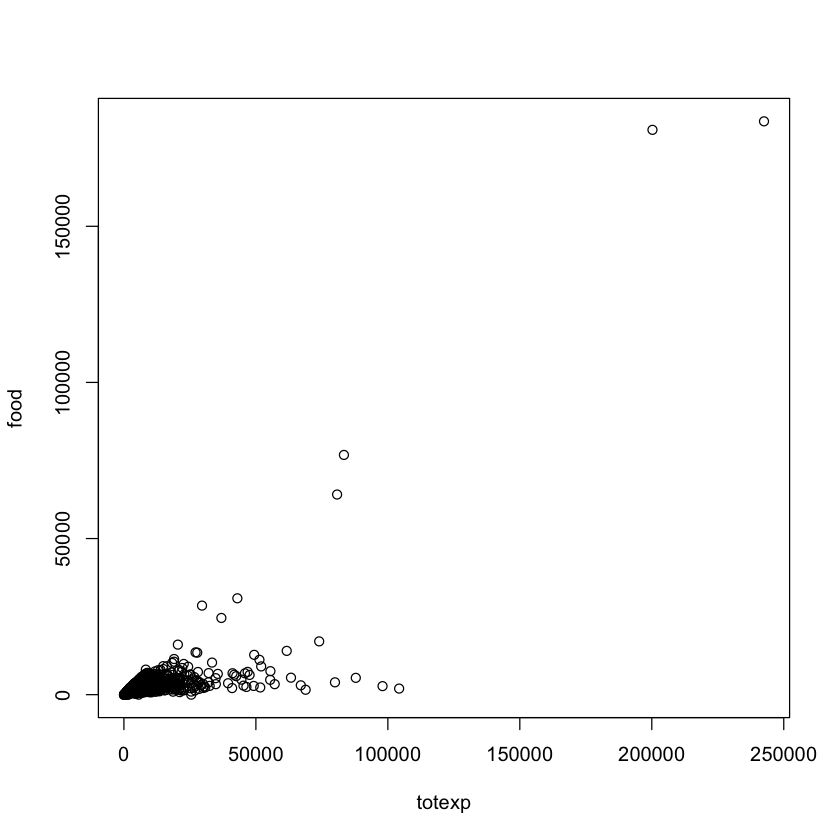

In [7]:
df %>% 
select(totexp,food) %>% 
plot()

# 2. Library ggplot2 

[Scatter plots](https://ggplot2.tidyverse.org/reference/geom_point.html)




In [8]:
#install.packages('ggplot2')
library(ggplot2)

## 2.1  Basic scatter 
- ggplot(DATAFRAME, aes(x=column_name_1, y= column_name_2) + geom_point()

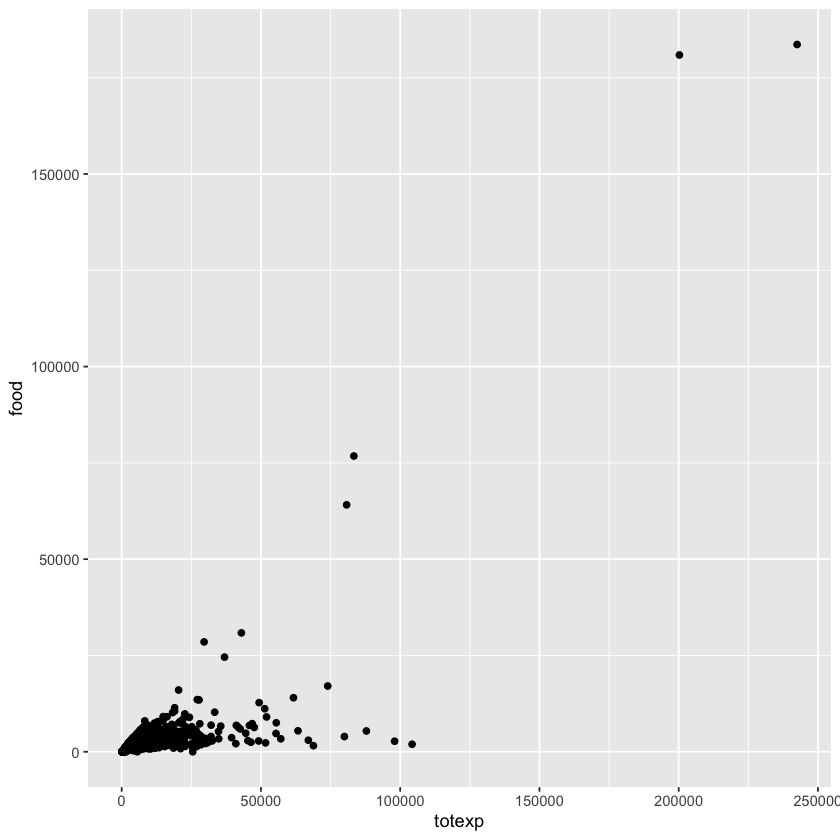

In [9]:
df %>% ggplot(aes(x = totexp , y = food)) + 
geom_point()


### 2.1.1 Scatter plot: Add title



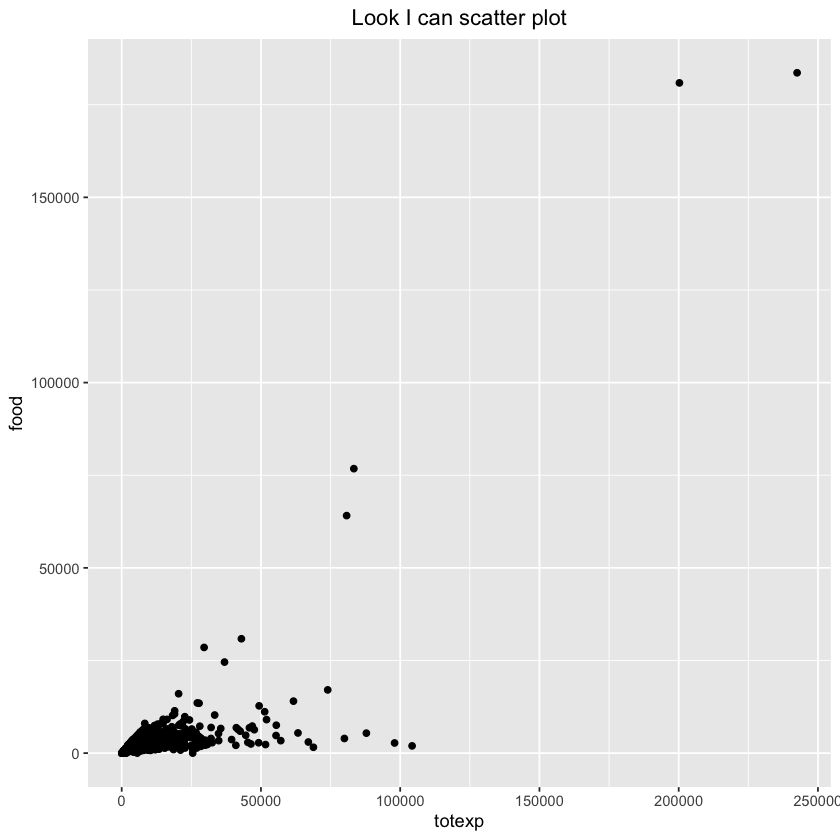

In [10]:
df %>% ggplot(aes(x = totexp , y = food)) + 
geom_point() +
ggtitle('Look I can scatter plot') + theme(plot.title = element_text(hjust = 0.5)) #title

### 2.1.2 Scatter plot: observation transparency and color


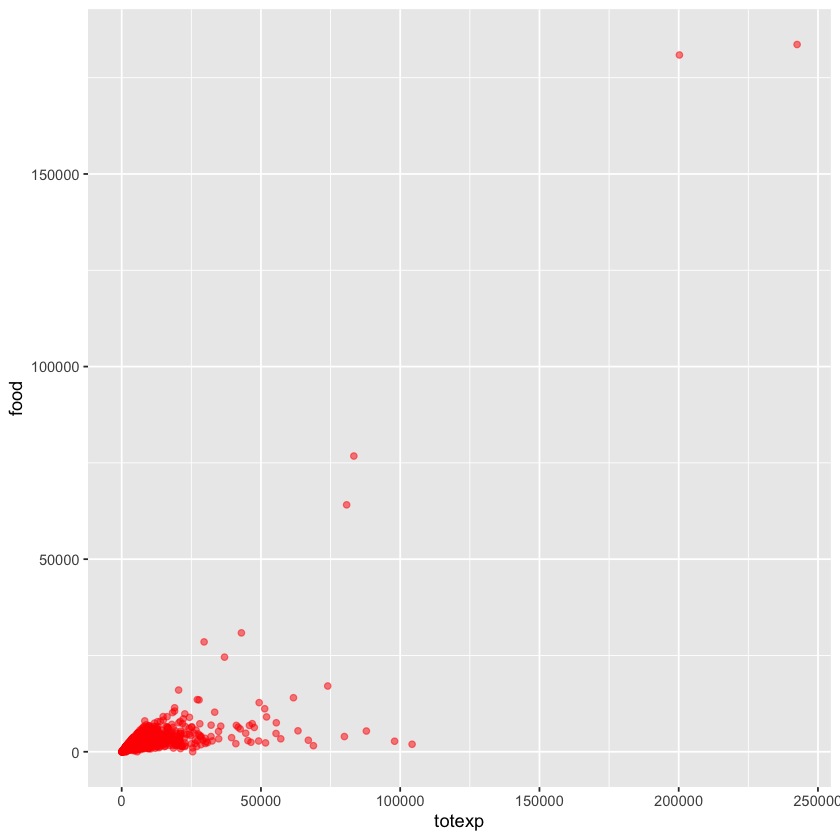

In [11]:
df %>% ggplot(aes(x = totexp , y = food))  + 
geom_point(alpha=.5, color='red')


## 2.2.[Bar charts](https://ggplot2.tidyverse.org/reference/geom_bar.html)

### 2.2.A Import data set

In [12]:
url = 'https://raw.githubusercontent.com/corybaird/PLCY_610_public/master/Reference_materials/Tutorials_R_Stata_Python/R/W3_ggplot/global_covid.csv'
df = read.csv(url)
head(df,3)

X name          confirm suspect dead  deadRate showRate heal  healRate
1 1 China          83039  88       3340  4.02    FALSE    77361 93.16   
2 2 United States 143071   0       2513  1.76    FALSE     4856  3.39   
3 3 Italy          97689   0      10779 11.03    FALSE    13030 13.34   
  showHeal
1  TRUE   
2 FALSE   
3 FALSE

### 2.2.1 Basic bar chart


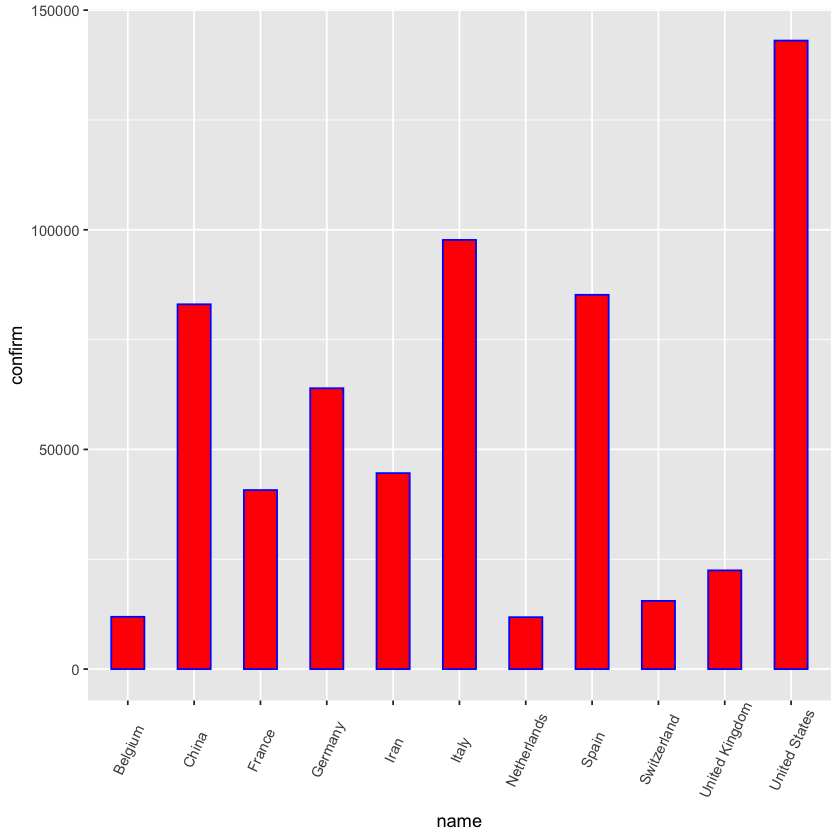

In [13]:
ggplot(df%>%filter(confirm>10000), aes(x=name, y=confirm)) + 
geom_bar(stat="identity", width=.5, fill='red',color='blue')+  
theme(axis.text.x = element_text(angle=65, vjust=0.6))

### 2.2.2 Ordered bar chart


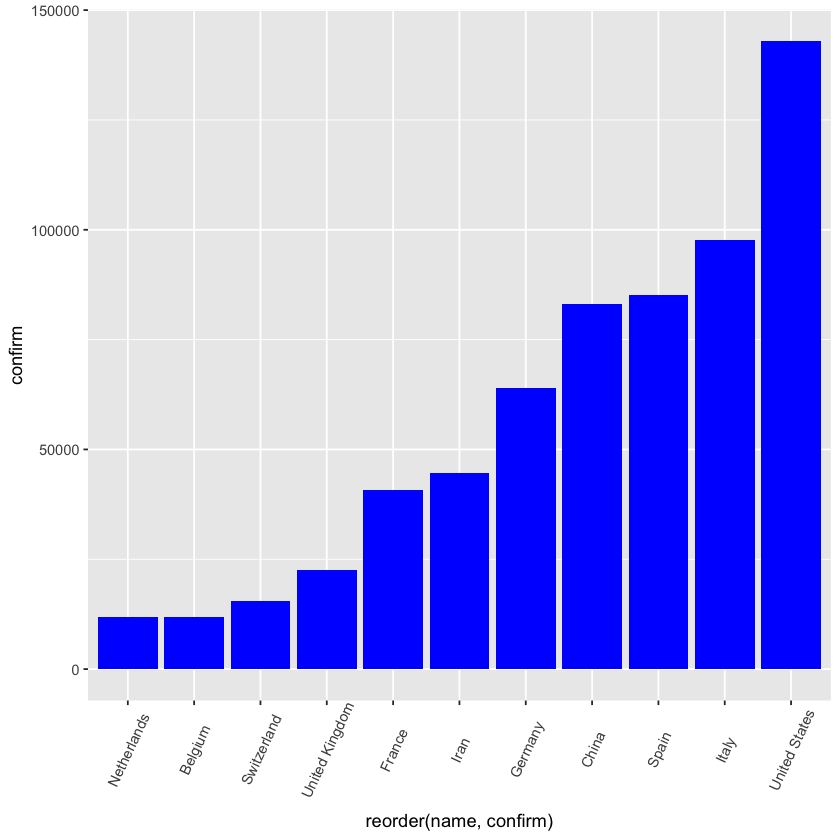

In [14]:
ggplot(df%>%arrange(desc(confirm))%>%filter(confirm>10000), aes(x=reorder(name, confirm), y=confirm)) + 
geom_bar(stat="identity", fill='blue')+  
theme(axis.text.x = element_text(angle=65, vjust=0.6))

## 2.3. [Line charts](https://www.r-graph-gallery.com/279-plotting-time-series-with-ggplot2.html)

In [15]:
url = 'https://raw.githubusercontent.com/corybaird/PLCY_610_public/master/Reference_materials/Tutorials_R_Stata_Python/R/W3_ggplot/Covid_TS_global.csv'
df = read.csv(url)
df %>% head(2)


X country     date       confirmed deaths recovered
1 1 Afghanistan 2020-01-22 0         0      0        
2 2 Afghanistan 2020-01-23 0         0      0

### 2.3.B Change data type

In [16]:
#Show data types by column
df %>% str()

'data.frame':	14352 obs. of  6 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ country  : Factor w/ 184 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ date     : Factor w/ 78 levels "2020-01-22","2020-01-23",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ confirmed: int  0 0 0 0 0 0 0 0 0 0 ...
 $ deaths   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ recovered: int  0 0 0 0 0 0 0 0 0 0 ...


In [17]:
# Convert column from factor to date
df$date = as.Date(df$date)

In [18]:
df %>% str()

'data.frame':	14352 obs. of  6 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ country  : Factor w/ 184 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ date     : Date, format: "2020-01-22" "2020-01-23" ...
 $ confirmed: int  0 0 0 0 0 0 0 0 0 0 ...
 $ deaths   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ recovered: int  0 0 0 0 0 0 0 0 0 0 ...


### 2.3.1 One line


In [19]:
japan = df %>% filter(country=='Japan')
head(japan,2)

X    country date       confirmed deaths recovered
1 6709 Japan   2020-01-22 2         0      0        
2 6710 Japan   2020-01-23 2         0      0

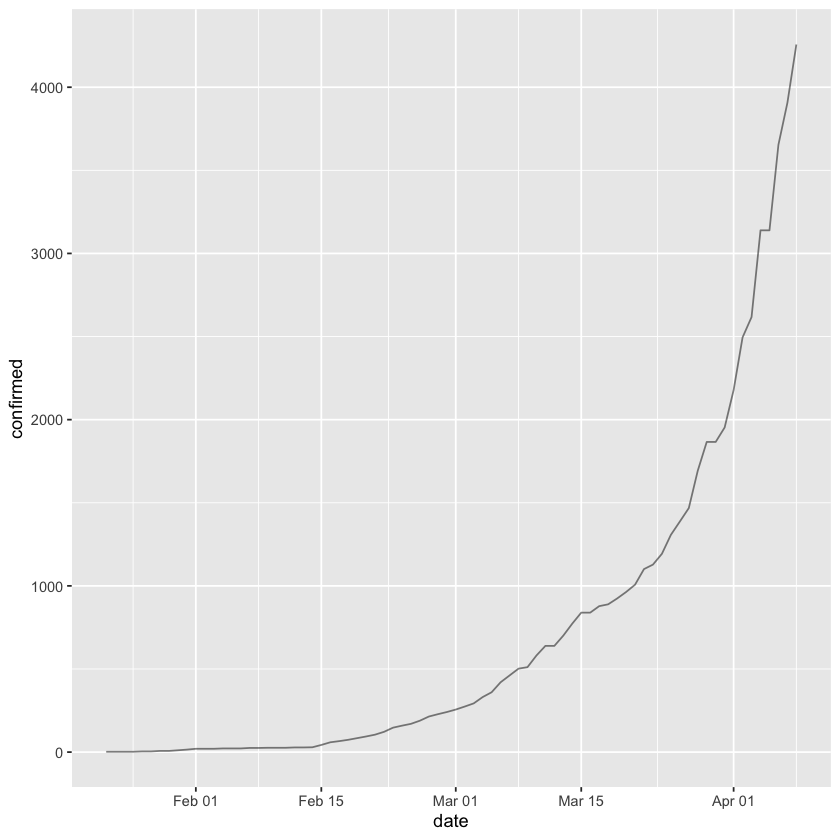

In [20]:
japan %>% 
ggplot(aes(x=date, y=confirmed)) + geom_line(alpha=0.5)

### 2.3.2 Multiple lines


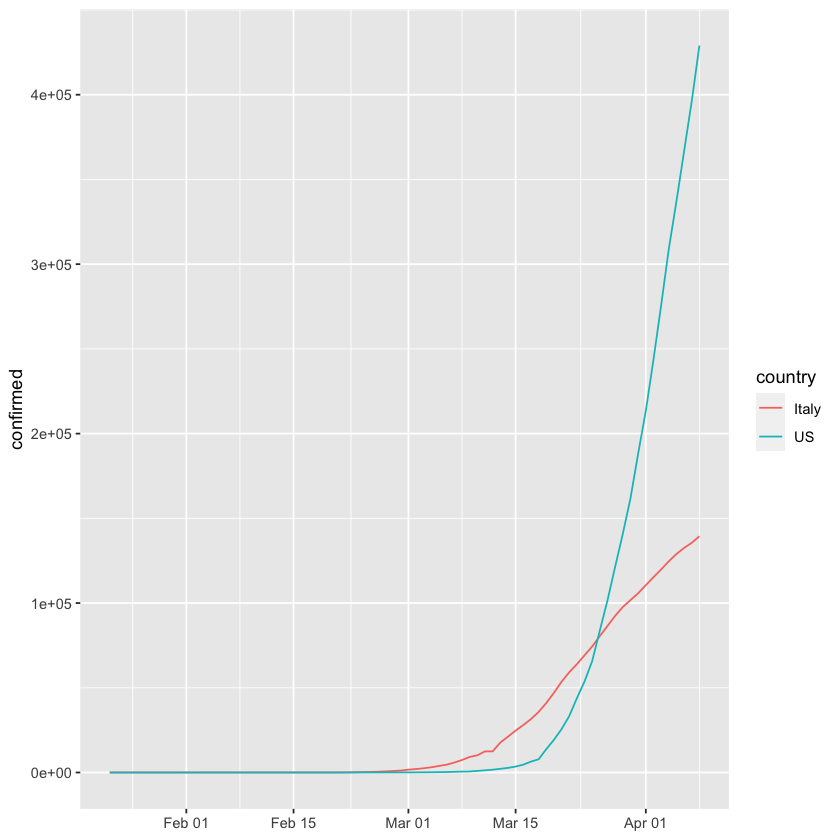

In [21]:
df %>% filter(country=='Italy'| country=="US") %>% 
ggplot(aes(x=date, y=confirmed)) + geom_line(aes(color=country))+ 
theme(axis.title.x=element_blank())

### 2.3.3 Multiple graphs


In [22]:
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



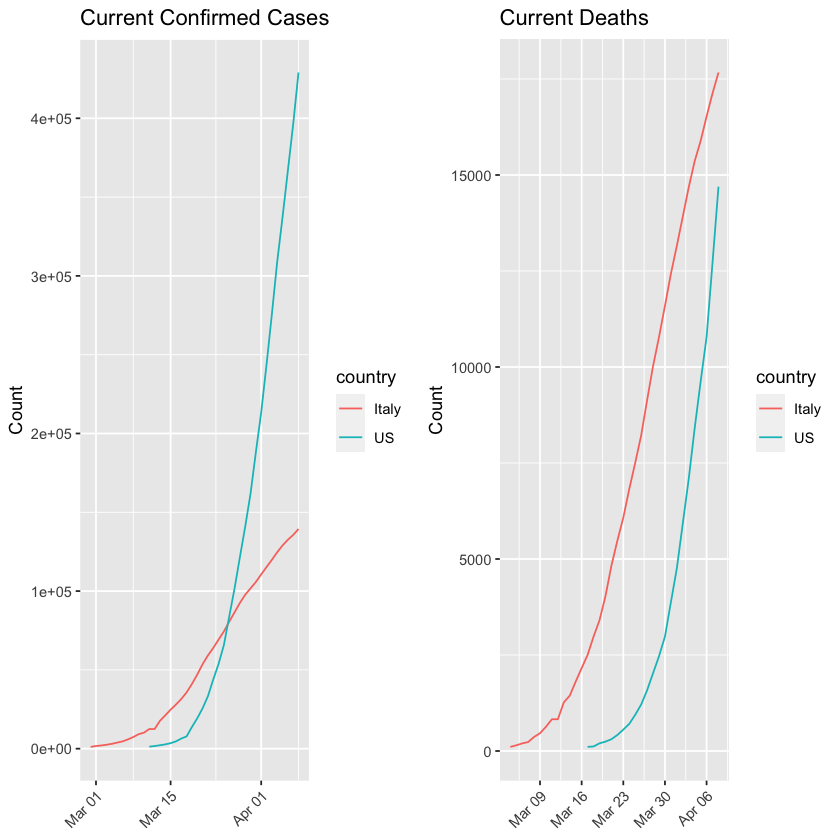

In [23]:
plot1 = df %>% filter(confirmed>1000)  %>%  filter(country=='Italy'| country=="US") %>% 
ggplot(aes(x=date, y=confirmed)) + geom_line(aes(color=country))+ 
theme(axis.title.x=element_blank())+
xlab('') + ylab('Count') + labs(title='Current Confirmed Cases') + theme(axis.text.x=element_text(angle=45, hjust=1))

plot2 = df %>% filter(deaths>100) %>%filter(country=='Italy'| country=="US") %>% 
ggplot(aes(x=date, y=deaths)) + geom_line(aes(color=country))+ 
theme(axis.title.x=element_blank())+
xlab('') + ylab('Count') + labs(title='Current Deaths') + theme(axis.text.x=element_text(angle=45, hjust=1))

grid.arrange(plot1, plot2, ncol=2)

# 3. Mapping

## 3.1 Built in maps

### 3.1.1 List providers object

In [29]:
names(providers)[c(1:5)] #Shows first 5 in provider list

[1] "OpenStreetMap"        "OpenStreetMap.Mapnik" "OpenStreetMap.DE"    
[4] "OpenStreetMap.CH"     "OpenStreetMap.France"

### 3.1.2 Search providers object

In [30]:
filter = str_detect(names(providers), "Esri") #Creates filter
names(providers)[filter] #Filters Esri maps

[1] "Esri"                   "Esri.WorldStreetMap"    "Esri.DeLorme"          
 [4] "Esri.WorldTopoMap"      "Esri.WorldImagery"      "Esri.WorldTerrain"     
 [7] "Esri.WorldShadedRelief" "Esri.WorldPhysical"     "Esri.OceanBasemap"     
[10] "Esri.NatGeoWorldMap"    "Esri.WorldGrayCanvas"

### 3.1.3. Show ESRI map

In [31]:
leaflet() %>%
  addProviderTiles("Esri")

HTML widgets cannot be represented in plain text (need html)

## 3.2 Map 1 point with popup

In [32]:
#Enter longitude and latitude
long = -76.948270
lat = 38.983640
# Creat map
leaflet() %>% 
  addProviderTiles("CartoDB") %>% 
  addMarkers(lng = long, lat = lat, popup = 'SPP')

HTML widgets cannot be represented in plain text (need html)

## 3.3 Map from dataframe

### 3.2.1 Import dataframe

In [33]:
url = "https://assets.datacamp.com/production/repositories/1942/datasets/18a000cf70d2fe999c6a6f2b28a7dc9813730e74/ipeds.csv"
ipeds = read.csv(url)
ipeds %>% head(3)

name                                    lat      lng       sector_label
1 A T Still University of Health Sciences 40.19365 -92.58918 Private     
2 Abilene Christian University            32.46915 -99.70954 Private     
3 Abraham Baldwin Agricultural College    31.48189 -83.52828 Public

### 3.2.2 Map example 1

In [34]:
map = leaflet() %>% 
addProviderTiles("CartoDB") %>% 
addCircleMarkers(data=ipeds,
                   radius = 2, color = "red", popup=~name)
map

Assuming "lng" and "lat" are longitude and latitude, respectively


HTML widgets cannot be represented in plain text (need html)

###  3.2.3 Map example 2

In [35]:
map2 <- map %>% 
  clearMarkers() %>% 
  clearBounds()
map2 %>% 
  addCircleMarkers(data = ipeds, radius = 2, 
                   popup = ~paste0(name, "<br/>","<br/>", sector_label))


Assuming "lng" and "lat" are longitude and latitude, respectively


HTML widgets cannot be represented in plain text (need html)

### 3.2.4 Map example 3

In [36]:
# Make a color palette called pal for the values of `sector_label` using `colorFactor()`  
# Colors should be: "red", "blue", and "#9b4a11" for "Public", "Private", and "For-Profit" colleges, respectively
pal <- colorFactor(palette = c("red", "blue", "#9b4a11"), 
                   levels = c("Public", "Private", "For-Profit"))

# Add circle markers that color colleges using pal() and the values of sector_label
map2 <- 
    map %>% 
        addCircleMarkers(data = ipeds, radius = 2, 
                         color = ~pal(sector_label), 
                         label = ~paste0(name, " (", sector_label, ")"))%>% 
    addLegend(pal = pal, 
              values = c("Public", "Private", "For-Profit"))

# Print map2
map2

Assuming "lng" and "lat" are longitude and latitude, respectively


HTML widgets cannot be represented in plain text (need html)

# 3. Leaflets extras

In [39]:
library(leaflet.extras)
library(htmltools)

## 3.1 Create three dfs for type of schools

In [40]:
# Create data frame called public with only public colleges
public <- ipeds %>% filter(sector_label == "Public")  
profit <- ipeds %>%filter(sector_label == "For-Profit")  
private <- ipeds %>% filter(sector_label == "Private")  

## 3.2 Adding multiple map layers

In [41]:
m4 <- leaflet() %>% 

#Adding three sep maps part 1
        addTiles(group = "OSM") %>% 
        addProviderTiles("CartoDB", group = "Carto") %>% 
        addProviderTiles("Esri", group = "Esri")

## 3.3 Adding schools

In [42]:
m4  = m4 %>% addCircleMarkers(data = public, radius = 2, label = ~htmlEscape(name),
                         color = ~pal(sector_label), group = "Public") %>% #Public

        addCircleMarkers(data = private, radius = 2, label = ~htmlEscape(name),
                           color = ~pal(sector_label), group = "Private")  %>% #Private

        addCircleMarkers(data = profit, radius = 2, label = ~htmlEscape(name),
                         color = ~pal(sector_label), group = "For-Profit") #For profit

Assuming "lng" and "lat" are longitude and latitude, respectively
Assuming "lng" and "lat" are longitude and latitude, respectively
Assuming "lng" and "lat" are longitude and latitude, respectively


## 3.4 Add layer control: ability to toggle maps and groups in map

In [43]:
m4 = m4 %>% addLayersControl(baseGroups = c("OSM", "Carto", "Esri"), 
                         overlayGroups = c("Public", "Private", "For-Profit")) %>% 
        setView(lat = 39.8282, lng = -98.5795, zoom = 4) 
m4

HTML widgets cannot be represented in plain text (need html)

## 3.5 Search feature

In [44]:
# Make each sector of colleges searchable 
m4_search <- m4  %>% 
        addSearchFeatures(
            targetGroups = c("Public", "Private", "For-Profit"), 
            # Set the search zoom level to 18
            options = searchFeaturesOptions(zoom = 18)) 

# Try searching the map for a college
m4_search

HTML widgets cannot be represented in plain text (need html)

## 3.6 Cluster option

In [45]:
ipeds %>% 
    leaflet() %>% 
        addTiles() %>% 
        # Sanitize any html in our labels
        addCircleMarkers(radius = 2, label = ~htmlEscape(name),
                         # Color code colleges by sector using the `pal` color palette
                         color = ~pal(sector_label),
                         # Cluster all colleges using `clusterOptions`
                         clusterOptions = markerClusterOptions()) 

Assuming "lng" and "lat" are longitude and latitude, respectively


HTML widgets cannot be represented in plain text (need html)